In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [95]:
# reading the data
train_data = pd.read_csv('colon.csv')
test_data = pd.read_csv('colon.csv')
# storing the labels separately
train_label = train_data.iloc[:,-1]
test_label = test_data.iloc[:,-1]
# removing the last column from the data itself
train_X = train_data.iloc[:,:-1]
test_X = test_data.iloc[:,:-1]
# converting to numpy
train = train_X.to_numpy()
test = test_X.to_numpy()

In [96]:
print(train.shape)
print(test.shape)

(467, 1881)
(467, 1881)


In [97]:
print(train_label.shape)
print(test_label.shape)

(467,)
(467,)


In [98]:
def dis(x, y):
    return np.linalg.norm(x - y)

# My Classifier function, gets the predicted label
# to determine the accuracy later
def myclassifier(train, trainlabel, test):
    " Train is the training data"
    " Trainlabel is the training labels"
    " Test is the testing data"
    pred = []

    for testpoint in test:
        pred_dis = []
        for trainpoint in train:
            pred_dis.append(dis(testpoint, trainpoint))

        pred.append(trainlabel[np.argmin(pred_dis)])

    return np.array(pred)

def calculate_accuracy(true_labels, predicted_labels):
    # Ensure that the true labels and predicted labels have the same length
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Length of true_labels and predicted_labels must be the same.")

    # Count the number of correct predictions
    correct_predictions = sum(1 for true, predicted in zip(true_labels, predicted_labels) if true == predicted)

    # Calculate accuracy as the ratio of correct predictions to total predictions
    accuracy = correct_predictions / len(true_labels)

    return accuracy

# Part 1: Principal Component Analysis (PCA)

In [99]:
#1.1 Implement PCA from Scratch:
#a. Write Python code to implement PCA from scratch. 
#Include functions to compute the covariance matrix, eigenvalues, and eigenvectors.
#b. Apply your PCA implementation to reduce the dimensionality of the features in colon.csv
def my_pca(D, alpha):
    # 1) centering the data
    mean1 = np.mean(D, axis=0)
    D1 = D - mean1
    # 2) computing the covariance matrix
    cov = np.cov(D1, rowvar=False, bias=True)
    # 3) finding the eign values and eign vectors
    eigen_values, eigen_vectors = np.linalg.eig(cov)
    # 4) sorting the eigen values and eigen vectors (descending order)
    idx = np.argsort(eigen_values)[::-1]  # argsort goes smallest-largest, so [::-1] makes it largest-smallest
    eigen_values = eigen_values[idx]  # sorts the eigen values
    eigen_vectors = eigen_vectors[:,idx]  # sorts the eigen vectors
    # EXTRA STEP) finding an optimal k value that retains a significant amount of variance
    var_ratio = eigen_values / np.sum(eigen_values)  # array that stores the var ratio for each eigen_value
    cumulative_var_ratio = np.cumsum(var_ratio)  # array that stores a cumulative sum, adding the var ratio of each next PC every time
        # finding the smallest k that satisfies the target variance
    k = np.argmax(cumulative_var_ratio >= alpha) + 1  # adding 1 since indexing starts at 0
    reduced_eigen_vectors = eigen_vectors[:,:k]  # we only need principle components, not the entire eign vector, so we reduce it
    # 5) projecting
    projected_data = np.dot(D1, reduced_eigen_vectors)
    return projected_data, reduced_eigen_vectors, mean1, k, cumulative_var_ratio

PCA with my_pca (Train): 

[[  82981.52123419+0.j   47017.59678394+0.j   53226.60753021+0.j]
 [ -59318.71918388+0.j   57962.83131824+0.j    9771.76101673+0.j]
 [ -17456.66750867+0.j  -32075.74523135+0.j  -76198.02481295+0.j]
 ...
 [ -83448.74868956+0.j   17441.03665192+0.j   18004.90328551+0.j]
 [-125512.1682163 +0.j  -77497.18659293+0.j  -69471.80196798+0.j]
 [  60730.98584074+0.j  -93503.69375324+0.j  -42585.06642644+0.j]]
(467, 3)
# of Principal Components Used:  3
PCA with my_pca (Test): 

[[  82981.52123419+0.j   47017.59678394+0.j   53226.60753021+0.j]
 [ -59318.71918388+0.j   57962.83131824+0.j    9771.76101673+0.j]
 [ -17456.66750867+0.j  -32075.74523135+0.j  -76198.02481295+0.j]
 ...
 [ -83448.74868956+0.j   17441.03665192+0.j   18004.90328551+0.j]
 [-125512.1682163 +0.j  -77497.18659293+0.j  -69471.80196798+0.j]
 [  60730.98584074+0.j  -93503.69375324+0.j  -42585.06642644+0.j]]
(467, 3)
# of Principal Components Used:  3
The Cumulative Variance is: 81.55%


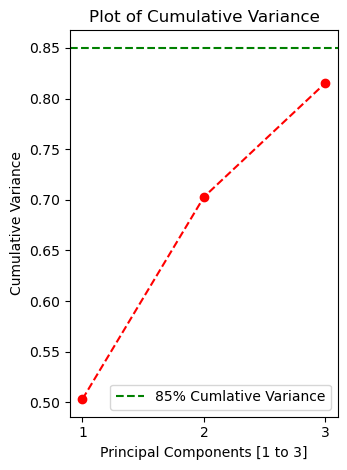

In [100]:
projected_train_pca, reduced_eign_vectors, mean1, k, cumulative_var_ratio = my_pca(train, alpha=0.8)

# TRAIN DATA PCA
print("PCA with my_pca (Train): \n")
print(projected_train_pca)
print(projected_train_pca.shape)
print("# of Principal Components Used: ", k)

# TEST DATA PCA
test_centered = test - mean1  # to center the test data, we have to center it by using the mean of the training data, NOT the mean of the test data
projected_test_pca = np.dot(test_centered, reduced_eign_vectors)

print("PCA with my_pca (Test): \n")
print(projected_test_pca)
print(projected_test_pca.shape)
print("# of Principal Components Used: ", k)
cumulative_var_ratio_real = cumulative_var_ratio[[0, 1, 2]].real
print('The Cumulative Variance is: %.2f%%' % (cumulative_var_ratio_real[2] * 100))
# Plot of Cumulative Variance
plt.subplot(1, 2, 2)
plt.scatter(range(1, len(cumulative_var_ratio_real) + 1), cumulative_var_ratio_real, color='red', marker='o')
plt.plot(range(1, len(cumulative_var_ratio_real) + 1), cumulative_var_ratio_real, linestyle='--', color='red')
plt.xticks(range(1, len(cumulative_var_ratio_real) + 1))
plt.axhline(y=0.85, color='green', linestyle='--', label='85% Cumlative Variance')
plt.xlabel('Principal Components [1 to 3]')
plt.ylabel('Cumulative Variance')
plt.title('Plot of Cumulative Variance')
plt.legend()
plt.tight_layout()
plt.show()

PCA with Scikit-Learn (Train): 

[[  82981.52123419   47017.59678394   53226.60753021]
 [ -59318.71918388   57962.83131824    9771.76101673]
 [ -17456.66750867  -32075.74523135  -76198.02481295]
 ...
 [ -83448.74868956   17441.03665192   18004.90328551]
 [-125512.1682163   -77497.18659293  -69471.80196798]
 [  60730.98584074  -93503.69375324  -42585.06642644]]
(467, 3)
# of Principle Components Used:  3
PCA with Scikit-Learn (Test): 

[[  82981.52123419   47017.59678394   53226.60753021]
 [ -59318.71918388   57962.83131824    9771.76101673]
 [ -17456.66750867  -32075.74523135  -76198.02481295]
 ...
 [ -83448.74868956   17441.03665192   18004.90328551]
 [-125512.1682163   -77497.18659293  -69471.80196798]
 [  60730.98584074  -93503.69375324  -42585.06642644]]
(467, 3)
# of Principle Components Used:  3
The Cumulative Variance is: 81.55%


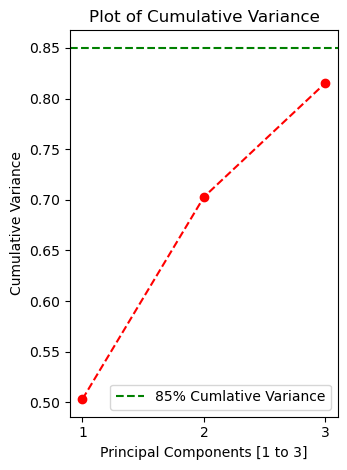

In [101]:
#1.2 PCA using scikit-learn:
#a. Use the PCA module from sklearn to perform dimensionality reduction on the dataset.
#b. Compare the results with your from-scratch implementation in terms of explained variance and the reduced feature set.
n_components = k
pca = PCA(n_components=n_components)

# SKLEARN PCA TRAIN
projected_train_pca_sklearn = pca.fit_transform(train)
print("PCA with Scikit-Learn (Train): \n")
print(projected_train_pca_sklearn)
print(projected_train_pca_sklearn.shape)
print("# of Principle Components Used: ", k)

# SKLEARN PCA TEST
projected_test_pca_sklearn = pca.transform(test)
print("PCA with Scikit-Learn (Test): \n")
print(projected_test_pca_sklearn)
print(projected_test_pca_sklearn.shape)
print("# of Principle Components Used: ", k)

explained_variance_ratio = pca.explained_variance_ratio_
cumsum_variance = explained_variance_ratio.cumsum()
print('The Cumulative Variance is: %.2f%%' % (cumsum_variance[2] * 100))

# Plot of Cumulative Variance
plt.subplot(1, 2, 2)
plt.scatter(range(1, len(cumsum_variance) + 1), cumsum_variance, color='red', marker='o')
plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, linestyle='--', color='red')
plt.xticks(range(1, len(cumsum_variance) + 1))
plt.axhline(y=0.85, color='green', linestyle='--', label='85% Cumlative Variance')
plt.xlabel('Principal Components [1 to 3]')
plt.ylabel('Cumulative Variance')
plt.title('Plot of Cumulative Variance')
plt.legend()
plt.tight_layout()
plt.show()

### b. Compare the results with your from-scratch implementation in terms of explained variance and the reduced feature set.
### The Cumlative Variance at 81.55% are exactly the same between my from-scratch implementation, and using sklearn. The reduced feature set from the from-scratch implementation and the sklearn implementation reduced to 3 dimensions on the train and test data.

# Part 2: Kernel PCA (KPCA)

In [102]:
# RBF kernel
def rbf_kernel(x, y, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)
# Poly kernel
def poly_kernel(x, y, degree=3):
    """ Polynomial Kernel """
    return np.dot(x, y) ** degree
#Linear kernel
def linear_kernel(x, y):
    return np.dot(x, y)
#Combined kernel
def combined_kernel(x, y, gamma=1.0, degree=3, alpha=0.5):
    return alpha * rbf_kernel(x, y, gamma) + (1 - alpha) * poly_kernel(x, y, degree)

In [103]:
def kernel_matrix(data, kernel_type, **kwargs):
    n_samples = data.shape[0]
    kernel_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            kernel_matrix[i, j] = kernel_type(data[i], data[j], **kwargs)
    return kernel_matrix, n_samples

In [104]:
def kPCA(data, kernel_type, n_components, **kwargs):
    kernel, n_samples = kernel_matrix(data, kernel_type, **kwargs)
    n_samples = data.shape[0]
    one_n = np.ones((n_samples, n_samples)) / n_samples
    m1 = one_n.dot(kernel)
    m2 = kernel.dot(one_n)
    m3 = one_n.dot(kernel).dot(one_n)
    mean2 = -(m1) - (m2) + (m3)
    # Center the kernel matrix
    centered_kernel_matrix = kernel + mean2
    # Get eigenvalues and eigenvectors
    kpca_eigen_values, kpca_eigen_vectors = np.linalg.eigh(centered_kernel_matrix)
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(kpca_eigen_values)[::-1]
    
    kpca_eigen_values = kpca_eigen_values[sorted_indices]
    kpca_eigen_vectors = kpca_eigen_vectors[:, sorted_indices]
    #dimensionality reduction
    kpca_eigen_vectors = kpca_eigen_vectors[:, :n_components]
    #Project the data
    projected_data = np.dot(centered_kernel_matrix, kpca_eigen_vectors)
    return projected_data, kpca_eigen_vectors

KPCA with kPCA (Train, RBF Kernel): 

[[ 9.75781955e-19  6.50521303e-19  2.92734587e-18 ... -3.25260652e-18
  -2.05998413e-18 -1.33492392e-18]
 [-3.90682195e-03  6.58961356e-03  1.34303537e-02 ... -9.41413724e-03
  -2.07700143e-03  3.49773388e-03]
 [-1.32758965e-01 -1.25578070e-02  3.75474571e-02 ...  3.24645740e-02
   2.11997789e-02  1.33340730e-03]
 ...
 [-1.66875930e-02  2.48250417e-03  1.56038542e-02 ... -1.35036084e-02
  -3.24619016e-02 -7.07087712e-03]
 [-1.93024101e-02 -3.70550160e-03  2.69135548e-02 ...  2.45918278e-02
   2.56013567e-02  5.46092148e-03]
 [ 1.59594802e-02  6.49526150e-03 -1.20839974e-02 ... -7.46731843e-03
   5.02907868e-03  1.54286815e-02]]
(467, 443)
# of Principal components used: 443
KPCA with kPCA (Test, RBF Kernel): 

[[ 9.75781955e-19  6.50521303e-19  2.92734587e-18 ... -3.25260652e-18
  -2.05998413e-18 -1.33492392e-18]
 [-3.90682195e-03  6.58961356e-03  1.34303537e-02 ... -9.41413724e-03
  -2.07700143e-03  3.49773388e-03]
 [-1.32758965e-01 -1.25578070e-0

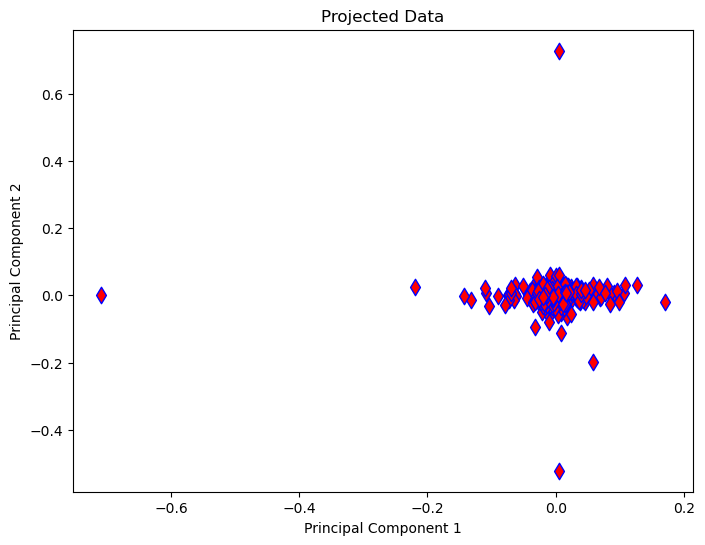

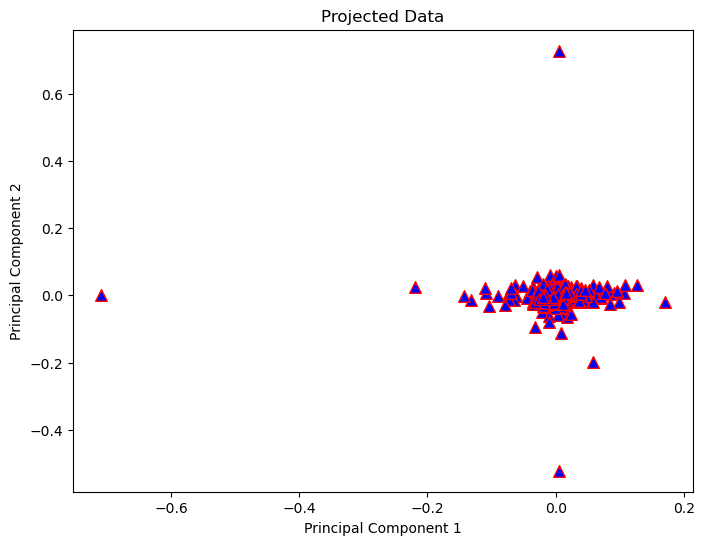

In [105]:
#Part 2: Kernel PCA (KPCA)
#2.1 KPCA with RBF Kernel:
#a. Implement Kernel PCA with the Radial Basis Function (RBF) kernel from scratch.
#b. Apply your KPCA implementation to the dataset.
projected_data_rbf, eigenvectors_rbf = kPCA(train, rbf_kernel, n_components=443, gamma=0.5)
print("KPCA with kPCA (Train, RBF Kernel): \n")
print(projected_data_rbf)
print(projected_data_rbf.shape)
print(f"# of Principal components used: {projected_data_rbf.shape[1]}")


projected_test_rbf_kpca, eigenvectors_test_rbf = kPCA(test, rbf_kernel, n_components=443, gamma=0.5)
print("KPCA with kPCA (Test, RBF Kernel): \n")
print(projected_test_rbf_kpca)
print(projected_test_rbf_kpca.shape)
print(f"# of Principal components used: {projected_test_rbf_kpca.shape[1]}")

# Scatter plot TRAIN Projected Data for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(projected_data_rbf[:, 0], projected_data_rbf[:, 1], c='red', marker='d', edgecolor='b', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

# Scatter plot TEST Projected Data for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(projected_test_rbf_kpca[:, 0], projected_test_rbf_kpca[:, 1], c='blue', marker='^', edgecolor='r', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

KPCA with kPCA (Train, Poly Kernel): 

[[-3.40375547e+33 -5.01961323e+33  3.48169391e+33 ... -3.52961526e+27
  -6.58306236e+27 -4.82433613e+27]
 [ 1.28166892e+34 -5.61371315e+32 -1.31485600e+33 ... -3.66509652e+26
   2.49684598e+27 -1.02099094e+28]
 [ 8.93406554e+33  2.29362410e+33  4.36584780e+32 ...  1.18358231e+27
   2.13777028e+26  6.06125042e+25]
 ...
 [ 1.36082777e+34  2.07151787e+33 -9.89417722e+32 ... -4.80096364e+26
  -2.32258429e+27  1.23594966e+27]
 [ 1.44514320e+34  5.98858286e+33 -1.14446464e+33 ... -5.11014007e+26
  -2.18205892e+27  3.03785307e+26]
 [-4.79881222e+32  3.79174667e+33  2.39136149e+33 ...  1.77163401e+26
  -1.48878676e+26 -7.65814839e+26]]
(467, 443)
# of Principal components used: 443
KPCA with kPCA (Test, Poly Kernel): 

[[-3.40375547e+33 -5.01961323e+33  3.48169391e+33 ... -3.52961526e+27
  -6.58306236e+27 -4.82433613e+27]
 [ 1.28166892e+34 -5.61371315e+32 -1.31485600e+33 ... -3.66509652e+26
   2.49684598e+27 -1.02099094e+28]
 [ 8.93406554e+33  2.29362410e

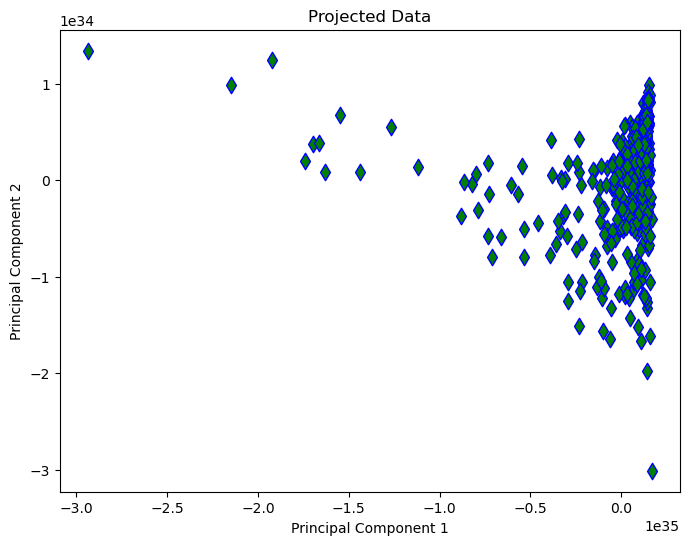

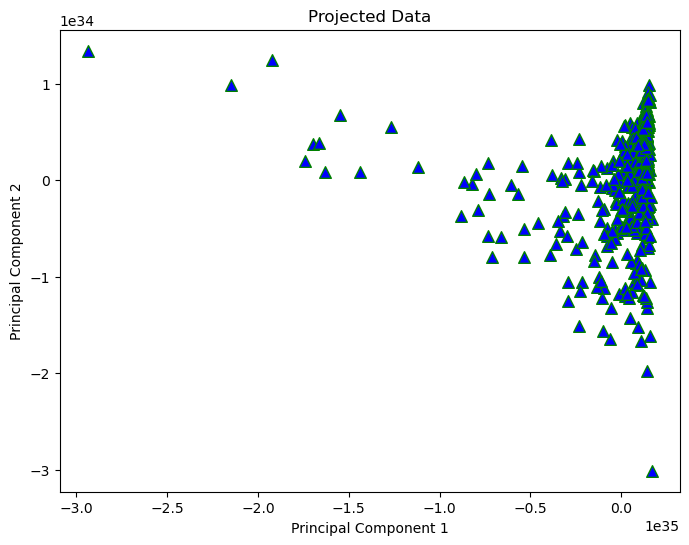

In [106]:
#2.2 KPCA with Polynomial Kernel:
#a. Implement Kernel PCA with a Polynomial kernel from scratch.
#b. Apply your KPCA implementation to the dataset.
projected_train_poly, eigenvectors_poly = kPCA(train, poly_kernel, n_components=443, degree=3)
print("KPCA with kPCA (Train, Poly Kernel): \n")
print(projected_train_poly)
print(projected_train_poly.shape)
print(f"# of Principal components used: {projected_train_poly.shape[1]}")

projected_test_poly, eigenvectors_test_poly = kPCA(test, poly_kernel, n_components=443, degree=3)
print("KPCA with kPCA (Test, Poly Kernel): \n")
print(projected_test_poly)
print(projected_test_poly.shape)
print(f"# of Principal components used: {projected_test_poly.shape[1]}")

# Scatter plot TRAIN Projected Data for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(projected_train_poly[:, 0], projected_train_poly[:, 1], c='green', marker='d', edgecolor='b', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

# Scatter plot TEST Projected Data for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(projected_test_poly[:, 0], projected_test_poly[:, 1], c='blue', marker='^', edgecolor='g', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

KPCA with kPCA (Train, Linear Kernel): 

[[ 2.27065180e+11 -8.10307919e+10 -6.88996716e+10 ... -3.10637140e+00
  -1.92029572e+00 -2.27262783e+00]
 [-1.62315844e+11 -9.98939641e+10 -1.26491459e+10 ... -8.69826555e-01
   2.29459763e+00  1.37432384e+00]
 [-4.77672776e+10  5.52797934e+10  9.86352340e+10 ...  3.61052513e-01
  -2.10869789e-01 -1.05135441e-01]
 ...
 [-2.28343671e+11 -3.00581295e+10 -2.33066126e+10 ...  5.42868704e-01
  -3.98214340e-01 -7.04317093e-01]
 [-3.43443247e+11  1.33559749e+11  8.99284130e+10 ...  5.97227097e-01
   6.12829208e-01 -1.22873878e+00]
 [ 1.66180278e+11  1.61145590e+11  5.51246309e+10 ... -8.50934982e-01
   8.34960938e-02  3.81849289e-01]]
(467, 443)
# of Principal components used: 443
KPCA with kPCA (Test, Linear Kernel): 

[[ 2.27065180e+11 -8.10307919e+10 -6.88996716e+10 ... -3.10637140e+00
  -1.92029572e+00 -2.27262783e+00]
 [-1.62315844e+11 -9.98939641e+10 -1.26491459e+10 ... -8.69826555e-01
   2.29459763e+00  1.37432384e+00]
 [-4.77672776e+10  5.52797

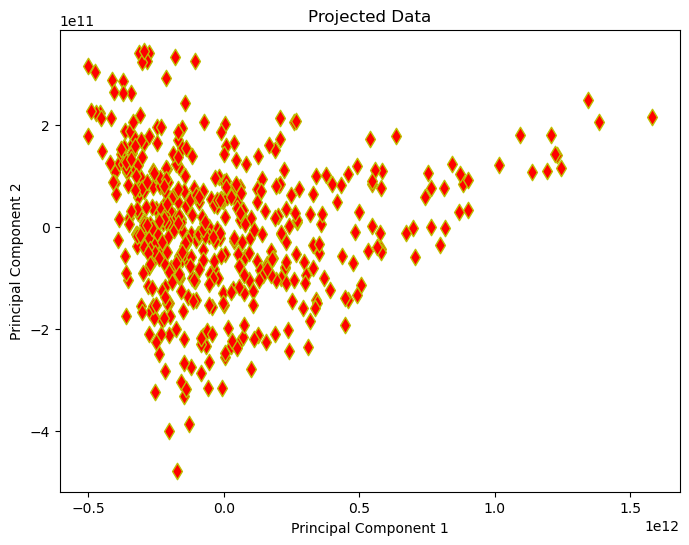

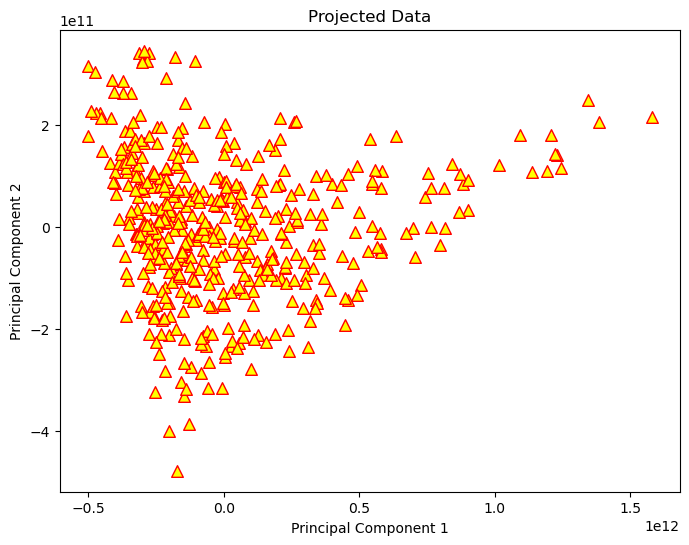

In [107]:
#2.3 KPCA with Linear Kernel:
#a. Implement Kernel PCA with a Linear kernel from scratch.
#b. Apply your KPCA implementation to the dataset.
projected_train_lin, eigenvectors_lin = kPCA(train, linear_kernel, n_components=443)
print("KPCA with kPCA (Train, Linear Kernel): \n")
print(projected_train_lin)
print(projected_train_lin.shape)
print(f"# of Principal components used: {projected_train_lin.shape[1]}")

projected_test_lin, eigenvectors_test_lin = kPCA(test, linear_kernel, n_components=443)
print("KPCA with kPCA (Test, Linear Kernel): \n")
print(projected_test_lin)
print(projected_test_lin.shape)

# Scatter plot TRAIN Projected Data for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(projected_train_lin[:, 0], projected_train_lin[:, 1], c='red', marker='d', edgecolor='y', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

# Scatter plot TEST Projected Data for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(projected_test_lin[:, 0], projected_test_lin[:, 1], c='yellow', marker='^', edgecolor='r', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

KPCA with kPCA (Train, Combined Kernel): 

[[-1.70187774e+33 -2.50980661e+33  1.74084696e+33 ... -1.76480763e+27
  -3.29153118e+27 -2.41216807e+27]
 [ 6.40834462e+33 -2.80685657e+32 -6.57428002e+32 ... -1.83254826e+26
   1.24842299e+27 -5.10495470e+27]
 [ 4.46703277e+33  1.14681205e+33  2.18292390e+32 ...  5.91791155e+26
   1.06888514e+26  3.03062521e+25]
 ...
 [ 6.80413884e+33  1.03575893e+33 -4.94708861e+32 ... -2.40048182e+26
  -1.16129214e+27  6.17974828e+26]
 [ 7.22571598e+33  2.99429143e+33 -5.72232322e+32 ... -2.55507004e+26
  -1.09102946e+27  1.51892653e+26]
 [-2.39940611e+32  1.89587334e+33  1.19568075e+33 ...  8.85817006e+25
  -7.44393381e+25 -3.82907420e+26]]
(467, 443)
# of Principal components used: 443
KPCA with kPCA (Test, Combined Kernel): 

[[-1.70187774e+33 -2.50980661e+33  1.74084696e+33 ... -1.76480763e+27
  -3.29153118e+27 -2.41216807e+27]
 [ 6.40834462e+33 -2.80685657e+32 -6.57428002e+32 ... -1.83254826e+26
   1.24842299e+27 -5.10495470e+27]
 [ 4.46703277e+33  1.1

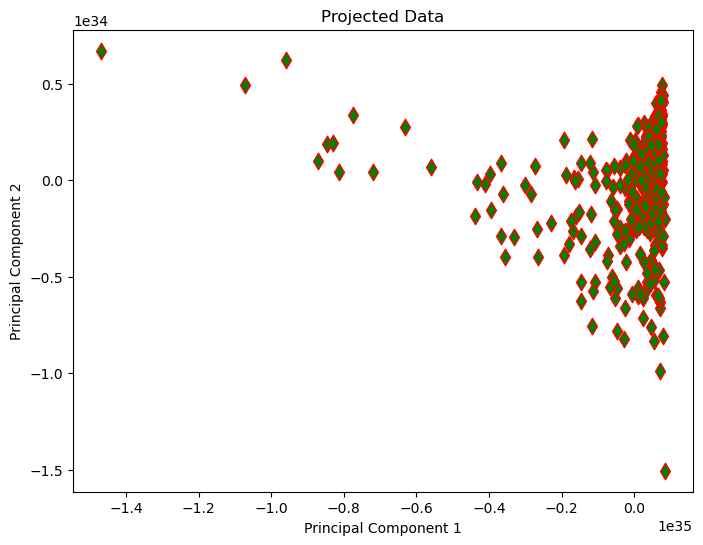

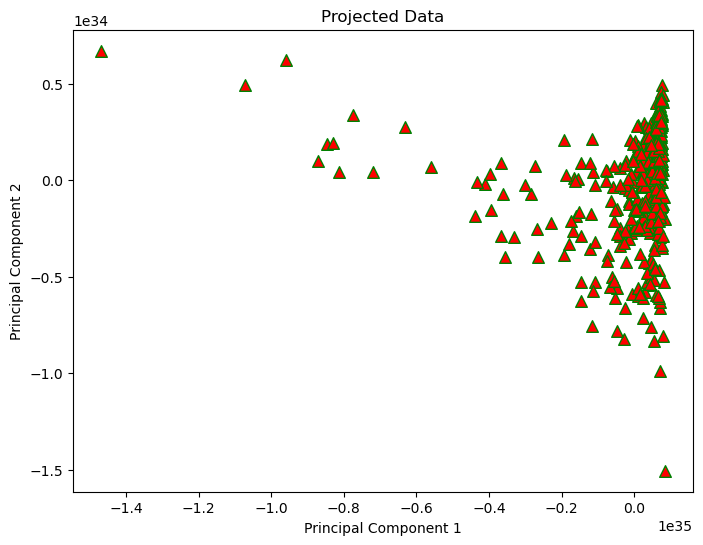

In [108]:
#2.4 Combining Kernels:
#a. Combine two different kernels (e.g., RBF and Polynomial) and apply the combined KPCA to the dataset.
#b. Evaluate the classification performance using accuracy metrics for the combined kernels.
projected_train_comb, eigenvectors_comb = kPCA(train, combined_kernel, n_components=443, gamma=1.0, degree=3, alpha=0.5)
print("KPCA with kPCA (Train, Combined Kernel): \n")
print(projected_train_comb)
print(projected_train_comb.shape)
print(f"# of Principal components used: {projected_train_comb.shape[1]}")

projected_test_comb, eigenvectors_test_comb = kPCA(test, combined_kernel, n_components=443, gamma=1.0, degree=3, alpha=0.5)
print("KPCA with kPCA (Test, Combined Kernel): \n")
print(projected_test_comb)
print(projected_test_comb.shape)
print(f"# of Principal components used: {projected_test_comb.shape[1]}")

# Scatter plot TRAIN Projected Data for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(projected_train_comb[:, 0], projected_train_comb[:, 1], c='green', marker='d', edgecolor='r', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

# Scatter plot TEST Projected Data for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(projected_test_comb[:, 0], projected_test_comb[:, 1], c='red', marker='^', edgecolor='g', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

In [109]:
#b. Evaluate the classification performance using accuracy metrics for the combined kernels.
predicted_label = myclassifier(projected_train_comb, train_label, projected_test_comb)
accuracy = calculate_accuracy(test_label, predicted_label)
# evaluating the classification performance on the test dataset using accuracy metrics
print('The Accuracy is: %.2f%%' % (accuracy * 100))

The Accuracy is: 100.00%


## Combined Kernels have 100% Accuracy using accuracy metrics

# Part 3: Testing and Evaluation

In [115]:
def PCA(D, k):
    n = D.shape[0] # find points in data
    mean_d = np.mean(D, axis=0) # the mean
    centered_data = D - mean_d #center data
    covariance = np.cov(centered_data, rowvar=False) # covar
    eigen_val, eigen_vect = np.linalg.eig(covariance) #eigen values
    index = np.argsort(eigen_val)[::-1]
    eigen_val = eigen_val[index] #eigenvalues
    eigen_vect = eigen_vect[:, index] #indexes
    eigen_vect1 = eigen_vect[:, :k] #reduce dimensions
    projected_d = np.dot(centered_data, eigen_vect1)
    return projected_d

In [116]:
# RBF kernel
def rbf_kernel(x, y, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)
# Poly kernel
def poly_kernel(x, y, degree=3):
    return np.dot(x, y) ** degree

#Linear kernel
def linear_kernel(x, y):
    return np.dot(x, y)

#Combined kernel
def combined_kernel(x, y, gamma=1.0, degree=3, alpha=0.5):
    return alpha * rbf_kernel(x, y, gamma) + (1 - alpha) * poly_kernel(x, y, degree)

In [117]:
def kernel_matrix(data, kernel_type, **kwargs):
    n_samples = data.shape[0]
    kernel_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            kernel_matrix[i, j] = kernel_type(data[i], data[j], **kwargs)
    return kernel_matrix

In [118]:
def kPCA(data, kernel_type, n_components, **kwargs):
    kernel = kernel_matrix(data, kernel_type, **kwargs)
    n_samples = data.shape[0]
    one_n = np.ones((n_samples, n_samples)) / n_samples
    m1 = one_n.dot(kernel)
    m2 = kernel.dot(one_n)
    m3 = one_n.dot(kernel).dot(one_n)
    # Center the kernel matrix
    centered_kernel_matrix = kernel - m1 - m2 + m3
    # Get eigenvalues and eigenvectors
    kpca_eigen_values, kpca_eigen_vectors = np.linalg.eigh(centered_kernel_matrix)
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(kpca_eigen_values)[::-1]
    
    kpca_eigen_values = kpca_eigen_values[sorted_indices]
    kpca_eigen_vectors = kpca_eigen_vectors[:, sorted_indices]
    #dimensionality reduction
    kpca_eigen_vectors = kpca_eigen_vectors[:, :n_components]
    #Project the data
    projected_data = np.dot(centered_kernel_matrix, kpca_eigen_vectors)
    return projected_data

In [119]:
#3.1 Applying PCA and KPCA to the Test Dataset:
#a. Use the PCA and KPCA models (RBF, Polynomial, Linear, and combined kernels) trained on the Train dataset to transform the Test dataset.
#b. Ensure the dimensionality reduction is consistent with what was performed on the training data.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('colon.csv')

# Separate the features and labels
attributes = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

# Split the data into training and testing sets
train, test, trainlabel, testlabel = train_test_split(attributes, labels, test_size=0.2, random_state=42)

# use standard scaler to get better result
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

#3.2 Covariance Matrix Analysis:
#a. Calculate the covariance matrix of the dataset.
#b. Identify the top 10 features with the highest covariance values.
# manually calculate the covariance matrix.
mu = np.mean(attributes, axis=0)
D1 = attributes - mu
cov_matrix = np.dot(D1.T, D1) / (df.shape[0]-1)
# Identify the feature variances
feature_variances = np.var(attributes, axis=0)
top_10_features_indices = np.argsort(feature_variances)[-10:]
top_10_feature_names = df.columns[top_10_features_indices].to_list()
# Split the top 10 features into train and test sets
# This will be used in the classfier later in the cell
train_top10 = train[:, top_10_features_indices]
test_top10 = test[:, top_10_features_indices]

# dis (distance function) returns the distance between two points
def dis(x, y):
    return np.linalg.norm(x - y)

# My Classifier function, gets the predicted label
# to determine the accuracy later
def myclassifier(train, trainlabel, test):
    pred = []
    for testpoint in test:
        pred_dis = [dis(testpoint, trainpoint) for trainpoint in train]
        pred.append(trainlabel[np.argmin(pred_dis)])
    return np.array(pred)

def calculate_accuracy(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Length of true_labels and predicted_labels must be the same.")
    correct_predictions = sum(1 for true, predicted in zip(true_labels, predicted_labels) if true == predicted)
    accuracy = correct_predictions / len(true_labels)
    return accuracy

#3.3 Classification Experiment:
#a. Choose a classifier (minimum distance classifier: provided at the end of this assignment) to classify the observations in the Test dataset.
#b. Evaluate the classification performance using accuracy metrics and compare the effectiveness of PCA and KPCA features.

# Combine train and test sets for PCA and Kernel PCA
combined_data = np.vstack((train, test))

# Apply PCA
projected_pca = PCA(combined_data, k=3)

# Split the projected data back into train and test sets
projected_train_pca = projected_pca[:train.shape[0]]
projected_test_pca = projected_pca[train.shape[0]:]

# Classify the test data using the custom classifier
pca_predicted_label = myclassifier(projected_train_pca, trainlabel, projected_test_pca)

# Calculate and print accuracy
pca_accuracy = calculate_accuracy(testlabel, pca_predicted_label)
print('[PCA] PCA kernel Test Accuracy: %.2f%%' % (pca_accuracy * 100.0))

# Apply RBF kernel KPCA
projected_rbf_kpca = kPCA(combined_data, rbf_kernel, n_components=443, gamma=1.0)

# Split the projected data back into train and test sets
projected_rbf_train_kpca = projected_rbf_kpca[:train.shape[0]]
projected_rbf_test_kpca = projected_rbf_kpca[train.shape[0]:]

# Classify the test data using the custom classifier
rbf_predicted_label = myclassifier(projected_rbf_train_kpca, trainlabel, projected_rbf_test_kpca)

# Calculate and print accuracy
rbf_accuracy = calculate_accuracy(testlabel, rbf_predicted_label)
print('[KPCA] RBF kernel Test Accuracy: %.2f%%' % (rbf_accuracy * 100.0))

# Apply Polynomial kernel KPCA
projected_poly_kpca = kPCA(combined_data, poly_kernel, n_components=443, degree=3)

# Split the projected data back into train and test sets
projected_poly_train_kpca = projected_poly_kpca[:train.shape[0]]
projected_poly_test_kpca = projected_poly_kpca[train.shape[0]:]

# Classify the test data using the custom classifier
poly_predicted_label = myclassifier(projected_poly_train_kpca, trainlabel, projected_poly_test_kpca)

# Calculate and print accuracy
poly_accuracy = calculate_accuracy(testlabel, poly_predicted_label)
print('[KPCA] Poly kernel Test Accuracy: %.2f%%' % (poly_accuracy * 100.0))

# Apply Linear kernel KPCA
projected_linear_kpca = kPCA(combined_data, linear_kernel, n_components=443)

# Split the projected data back into train and test sets
projected_linear_train_kpca = projected_linear_kpca[:train.shape[0]]
projected_linear_test_kpca = projected_linear_kpca[train.shape[0]:]

# Classify the test data using the custom classifier
linear_predicted_label = myclassifier(projected_linear_train_kpca, trainlabel, projected_linear_test_kpca)

# Calculate and print accuracy
linear_accuracy = calculate_accuracy(testlabel, linear_predicted_label)
print('[KPCA] Linear kernel Test Accuracy: %.2f%%' % (linear_accuracy * 100.0))

# Apply combined kernel KPCA
projected_combined_kpca = kPCA(combined_data, combined_kernel, n_components=443, gamma=1.0, degree=3, alpha=0.5)

# Split the projected data back into train and test sets
projected_combined_train_kpca = projected_combined_kpca[:train.shape[0]]
projected_combined_test_kpca = projected_combined_kpca[train.shape[0]:]

# Classify the test data using the custom classifier
comb_predicted_label = myclassifier(projected_combined_train_kpca, trainlabel, projected_combined_test_kpca)

# Calculate and print accuracy
comb_accuracy = calculate_accuracy(testlabel, comb_predicted_label)
print('[KPCA] Combined kernel Test Accuracy: %.2f%%' % (comb_accuracy * 100.0))

# 3.2
#c. Extract these top 10 features and evaluate the classification performance using accuracy metrics.
top_10_feature_names_str = ', '.join(top_10_feature_names)
print("Top 10 Features:")
print(f'{top_10_feature_names_str}')

pred_top10_label = myclassifier(train_top10, trainlabel, test_top10)
top_10_accuracy = calculate_accuracy(testlabel, pred_top10_label)
print('[TOP 10] Top 10 Features Test Accuracy: %.2f%%' % (top_10_accuracy * 100.0))

[PCA] PCA kernel Test Accuracy: 24.47%
[KPCA] RBF kernel Test Accuracy: 34.04%
[KPCA] Poly kernel Test Accuracy: 20.21%
[KPCA] Linear kernel Test Accuracy: 14.89%
[KPCA] Combined kernel Test Accuracy: 20.21%
Top 10 Features:
hsa-mir-99b, hsa-mir-203a, hsa-mir-22, hsa-mir-10b, hsa-mir-375, hsa-mir-148a, hsa-mir-10a, hsa-mir-192, hsa-mir-21, hsa-mir-143
[TOP 10] Top 10 Features Test Accuracy: 32.98%


# Conclusion

## Summary of Findings
> In my analysis i learned a lot about reducing dimensionality using Principal Component Analysis (PCA) and Kernel Principal Component Analysis (KPCA) and their performance including various parts i am going to discuss. First, PCA i decided to reduce the dimensionality to 3 PCx. PC1, PC2, and PC3. Each Projection of the data is shown as a plot, also, the eigenvectors to get more details about the data. The cumlative variance, eigenvalues and explained variance ratio printed in the cell for each PC in the From-scratch implementation is matching the values from the implementation from sklearn.

> KPCA implemented with rbf, poly, linear, and combined kernel showed plots that had the projected data result in cluster around the x,y axis (0,0). KPCA with rbf, linear, ploy, and combined kernel all have similar plots with their projected train and test data verifying the implementation is programmed correctly to visualize the data. The accuracies of PCA and KPCA after they have been used with PCA, and KPCA tested between 14.89% to 100% accuracy in all trials. The Top-10 feature names are `hsa-mir-99b, hsa-mir-203a, hsa-mir-22, hsa-mir-10b, hsa-mir-375, hsa-mir-148a, hsa-mir-10a, hsa-mir-192, hsa-mir-21, hsa-mir-143`, and the test accuracy for the top 10 features is 32.98%.
## Effectiveness of PCA and KPCA
> PCA's effectiveness of reducing the dimensionality was shown to keep its variance, as it was shown that over three components PC1, PC2, and PC3 that the cumlative variance was 81.55%. In addition to code that was not shown, i was able to successfully reduce the dimensionality with PCA and KPCA that was tested before the final implementation. PCA's accuracy was 24.47% on reducing the data to three dimensions.

> KPCA with rbf, poly, linear, and combined kernel was shown in the result to correctly return its train and test projected data with the correct amount of components. Linear had the lowest accuracy at 14.89%, Poly kernel had the second lowest accuracy at 20.21%, Poly and Combined kernel had the same accuracies at 20.21%.
## Methodology and Insights
> In implementing PCA from scratch i had to find points in the data, the mean, center the data, find the covariance, get the eigenvalues and the eigenvectors sort the indexes and then reduce the dimensions then return the projected data. I decided to add extra to this implementation by returning extra parameters so that i could check that the dimensions are working. At `cumulative_var_ratio_real = cumulative_var_ratio[[0, 1, 2]].real` it stores the cumulative variance ratio so i can get the cumlative sum of the explained variance ratio by `(cumulative_var_ratio_real[2] * 100))`.  In the sklean implementation of PCA printing the vector of the cumlative sum of the variance, showed that at each index it was matching the self-implemented version of PCA's cumlative variance. 

>In implementing KPCA from scratch i had to define all the functions i am going to use to complete the task. All kernels were defined in the cell, rbf, poly, linear, and combined kernel. In the next cell, i defined the kernel matrix that was going to get the matrix from the selected kernel rbf, poly, linear, or combined. Later in the code i redefined these functions on purpose so that i would not have to modify the other functions that returned more than one parameter which was the projected data.

>In doing the classification experiment i had to get all the accuracies for my implementation. First i had to figure out how to use the given functions for the assignment `def dis` `def myclassifier` and `def calculate_accuracy`. I needed to seperate the attributes and labels, to do this i needed to reshape the labels. Next, i split the data into train and test set and used standard scaler to get a better result.  I had to prepare train and test data for PCA and KPCA so that i could calculate the accuracy. I put this data into a variable called `combined_data` and passed it to each necessary function PCA and KPCA that includes the distance and classifier function too.

>Finally i ended the project doing section 3.2 which was to calculate the covariance matrix of the dataset. I used the manual calculation of the covariance matrix of the dataset. To complete the next task which was to find the top 10 features with the highest covariance values i had to sort the feature variances and their indexes to get the top 10 feature names and convert it to a list. To run the Top 10 classifier i had to convert the top 10 into train and test datasets. After i printed the 10 feature names, and the results from the classifier with the accuracy percentage.
# Advantages and Disadvantages of Implementation
> The hands-on experience of implementing PCA and KPCA from scratch is important to understanding Machine Learning, because other concepts are built upon understanding the material in a practical way. Implementing KPCA and PCA using sklearn was educational but if i did not code the KPCA and the PCA from scratch first, then i would not know what to find in the library after. Using sklearn's built-in functions is more safer because the library code has been verified by hundreds of people while the from-scratch method is for educational purposes. Overall, it was a good experiment to understand PCA and KPCA in reducing the dimensionality of the colon cancer data effectively.